In [1]:
import warnings as wr

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

wr.filterwarnings("ignore")

In [2]:
# Load the dataset
url = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Explore and Preprocess Data
# Check for missing values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


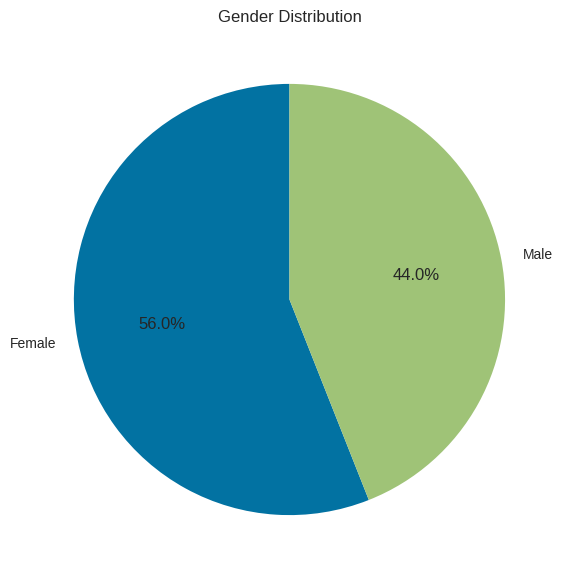

In [6]:
#EDA
plt.figure(figsize=(7,7))
plt.pie(df['Gender'].value_counts(), labels= ['Female', 'Male'], autopct= '%1.1f%%', startangle= 90)
plt.title('Gender Distribution')
plt.show()

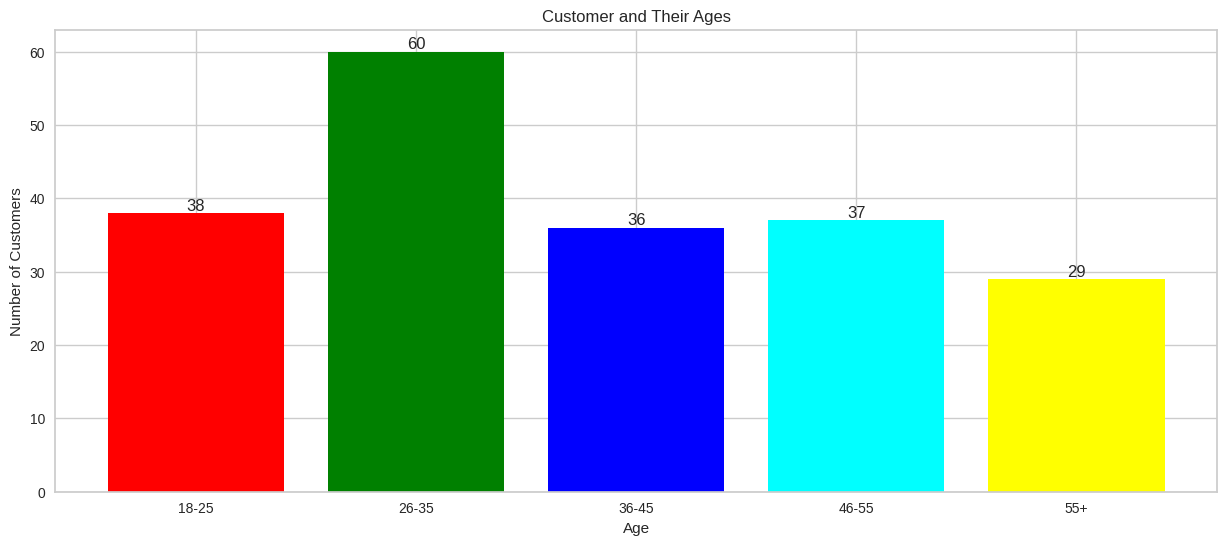

In [7]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [8]:
#data splitting
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:,[3,4]].values
#menampilkan data yang diambil

print(pd.DataFrame(X, columns= ['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [16]:
# Select features for clustering (e.g., Age and Annual Income)
# X = df[['Age', 'Annual Income (k$)']]

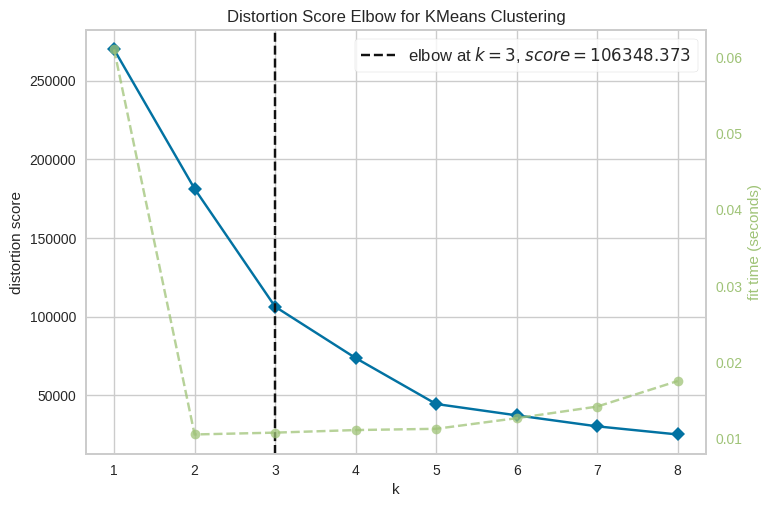

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
#Elbow Method
k_means = KMeans()

visualizer = KElbowVisualizer(k_means, k= (1,9))

visualizer.fit(X)

visualizer.show()

In [17]:
# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [10]:
# Determine the Optimal Number of Clusters (Elbow Method)
# The Elbow Method helps decide the number of clusters by plotting the inertia.
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow Curve
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.show()


In [11]:
k_means = KMeans(n_clusters= 4, random_state= 0)

k_means.fit(X)

labels = k_means.labels_

K = 4

#fungsi analisis untuk clustering 
def analyze_cluster(X, labels, K):
    print("Analisis untuk setiap cluster")
    for i in range (K):
        cluster_data = X[labels == i]
        #menghitung rata-rata dari annual income
        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()

        print(f"\n Cluster {i + 1} : ")
        print(f"mean income : {mean_income:.2f}")
        print(f"mean spending: {mean_spending:.2f}")

analyze_cluster(X, labels, K)

Analisis untuk setiap cluster

 Cluster 1 : 
mean income : 86.54
mean spending: 82.13

 Cluster 2 : 
mean income : 48.26
mean spending: 56.48

 Cluster 3 : 
mean income : 87.00
mean spending: 18.63

 Cluster 4 : 
mean income : 26.30
mean spending: 20.91


In [12]:
# Train the K-Means Model
# Select the optimal number of clusters (e.g., 3).

# # Train the model with 3 clusters
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X_scaled)

# # Add cluster labels to the original data
# df['Cluster'] = kmeans.labels_
# df.head()

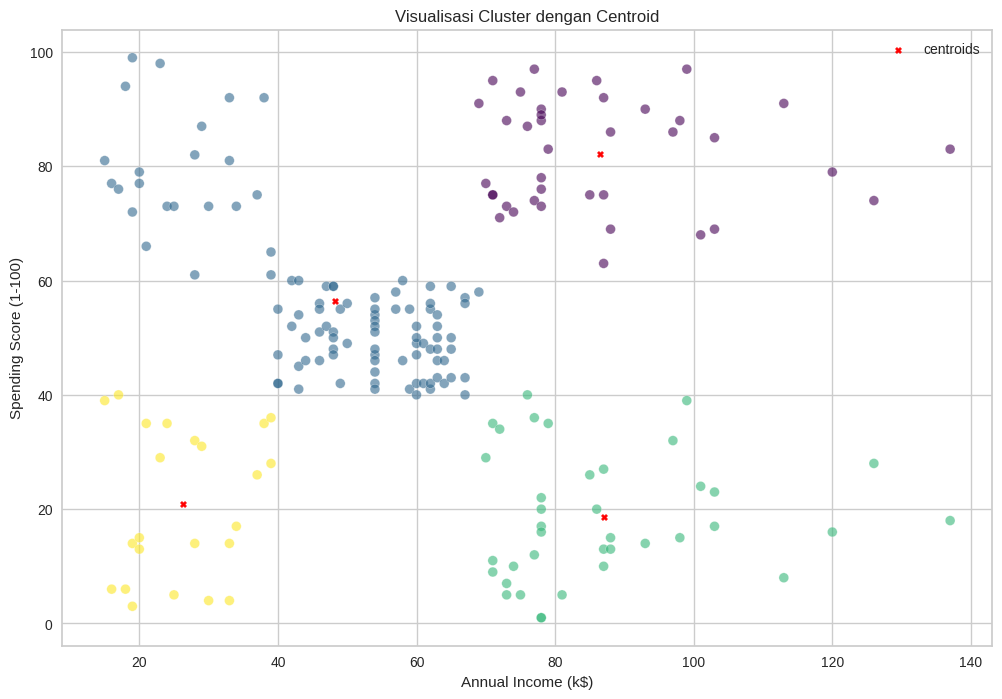

Nilai Centroids
centroids: 1, Annual Income: 86.54, Spending Score: 82.13
centroids: 2, Annual Income: 48.26, Spending Score: 56.48
centroids: 3, Annual Income: 87.00, Spending Score: 18.63
centroids: 4, Annual Income: 26.30, Spending Score: 20.91


In [14]:
centroids = k_means.cluster_centers_

plt.figure(figsize= (12, 8))

#plot data
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= 'viridis', s = 50, alpha= 0.6, marker= 'o', edgecolors= 'w')

#plot centroids
plt.scatter(centroids[:, 0], centroids[:,1], c = 'red',s = 20, marker= 'X', label= 'centroids')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

#menampilkan nilai centroids
print("Nilai Centroids")
for j, centroid in enumerate(centroids):
    print(f"centroids: {j + 1}, Annual Income: {centroid[0]:.2f}, Spending Score: {centroid[1]:.2f}")

In [16]:
# Evaluate the Clustering
# Use metrics like the Silhouette Score to evaluate the quality of clusters.
# from sklearn.metrics import silhouette_score
# score = silhouette_score(X, kmeans.labels_)
# print(f'Silhouette Score: {score:.2f}')


In [ ]:
# Key Notes
# Preprocessing: Standardizing the data is crucial to ensure fair clustering.
# Elbow Method: Helps identify the optimal number of clusters.
# Visualization: Provides insights into the grouping of data points.
# Silhouette Score: A higher score (closer to 1) indicates well-defined clusters.